# PDBBind Ground Truth Data Analysis on Compass

## Filter Data

Filter `summary_new.csv` file into some ranges!

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


# Function to filter the CSV file
def filter_csv(input_file_path, output_file_path):
    """
    Filters rows in a CSV file where 'Binding Affinity (kcal/mol)', 'Number of clashes' and 'Strain Energy' equals a specific value.

    Parameters:
    - input_file_path: Path to the input CSV file.
    - output_file_path: Path where the filtered CSV file will be saved.
    """
    # Load the CSV file
    data = pd.read_csv(input_file_path)

    # Filter the dataframe
    filtered_data = data[
        (data['Binding Affinity (kcal/mol)'] < 20) &
        (data['Number of clashes'] < 20) &
        (data['Strain Energy'] < 20)
    ]

    # Save the filtered data to a new CSV file
    filtered_data.to_csv(output_file_path, index=False)
    print(f"Filtered data saved to: {output_file_path}")


In [2]:
# Base directory and filename patterns
base_dir = '/fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/PDBBind_GT/data/'
input_filename = 'summary_new.csv'
output_filename_pattern = 'filtered_summary_new.csv'

# Full input file path
input_file_path = base_dir + input_filename

output_file_path = base_dir + output_filename_pattern
filter_csv(input_file_path, output_file_path)


Filtered data saved to: /fast/AG_Akalin/asarigun/Arcas_Stage_1/ROOF/COMPASS/experiments/PDBBind_GT/data/filtered_summary_new.csv


## Read Filtered CSV

In [3]:

file_path = f'{base_dir}{output_filename_pattern}'
data = pd.read_csv(file_path)
num_rows = data.shape[0]  
print(f'Total number of data points for recursion step: {num_rows}')
print(f'First few rows of the dataframe:')
display(data.head()) 
    

Total number of data points for recursion step: 13977
First few rows of the dataframe:


,Protein ID,Binding Affinity (kcal/mol),Number of clashes,Strain Energy,Confidence Score,Rank of sdf,_timestamp,_runtime,_step
0,5sz6_protein_processed,-7.602188,3.0,4.176327e-01,NaN,5sz6_ligand,1.711412e+09,24.775484,6
1,5mnb_protein_processed,-3.840684,1.0,-1.849010e-11,NaN,5mnb_ligand,1.711411e+09,8.773636,6
2,6i15_protein_processed,-8.620834,0.0,1.155100e+00,NaN,6i15_ligand,1.711417e+09,44.015287,6
3,1m21_protein_processed,-10.481425,8.0,4.707757e+00,NaN,1m21_ligand,1.711382e+09,45.829656,6
4,1o3h_protein_processed,-7.519090,13.0,5.197161e+00,NaN,1o3h_ligand,1.711383e+09,10.308844,3


## Data Distributions

Total number of data points: 13977


FileNotFoundError: [Errno 2] No such file or directory: 'data/pdbbind_dist_compass.png'

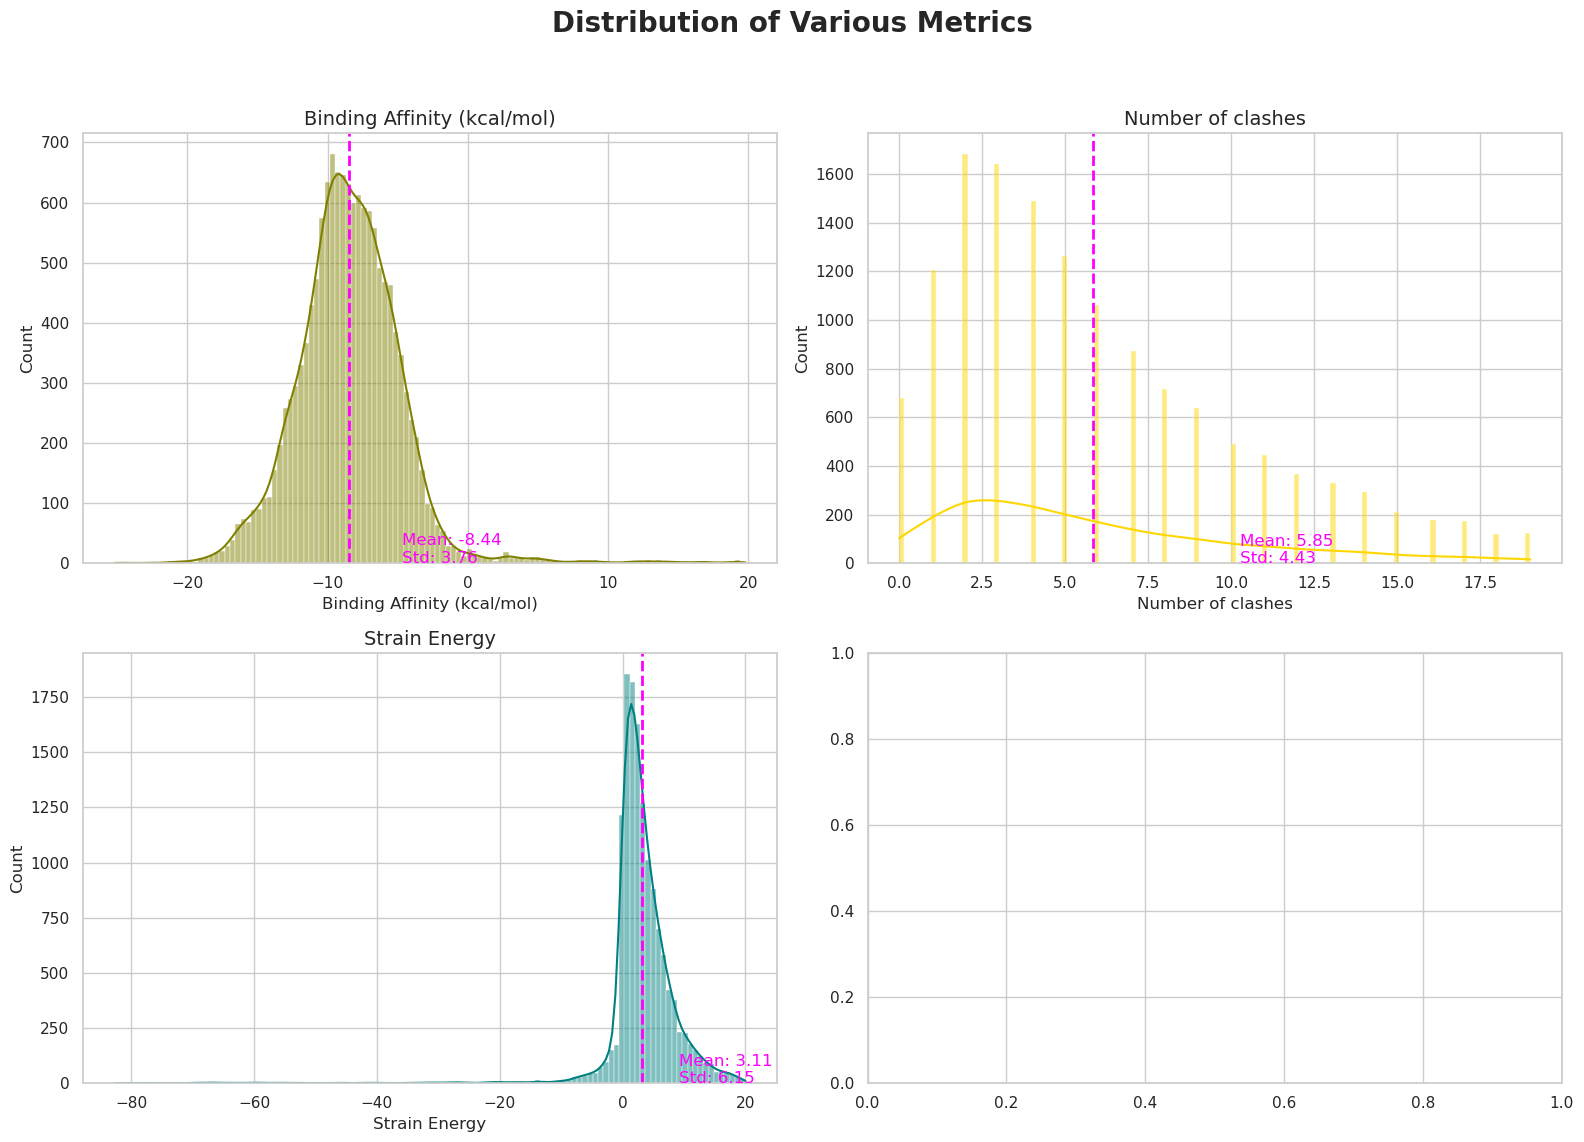

In [4]:
# Function to plot distributions of metrics from a given dataset
def plot_metrics_distributions(data, figure_title):
    # Set the overall aesthetics
    sns.set(style="whitegrid", palette="pastel")

    # Prepare the figure with a larger size for better readability
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Increased figure size for better legibility
    fig.suptitle(figure_title, fontsize=20, fontweight='bold')

    # Define a common bin size for comparable scales
    common_bins = 120  # Example bin size, adjust based on data distribution

    # List of metrics to plot
    metrics = ['Binding Affinity (kcal/mol)', 'Number of clashes', 'Strain Energy']
    colors = ['olive', 'gold', 'teal', 'purple']

    # Plotting distributions
    for i, metric in enumerate(metrics):
        ax = axes.flat[i]
        sns.histplot(data=data, x=metric, kde=True, ax=ax, color=colors[i], bins=common_bins)
        ax.set_title(metric, fontsize=14)
        ax.grid(True)

        # Calculate mean and std, and annotate on the plots
        mean_value = data[metric].mean()
        std_value = data[metric].std()
        ax.axvline(mean_value, color='magenta', linestyle='dashed', linewidth=2)
        ax.text(mean_value + std_value, 0.7, f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}', color='magenta', ha='left')

    # Adjust layout for a clean look and ensure the titles and labels don't overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('data/pdbbind_dist_compass.png', dpi=1000) 

    # Show plot
    plt.show()


# plot data dist.

file_path = f'{base_dir}{output_filename_pattern}'
data = pd.read_csv(file_path)
num_rows = data.shape[0]  
print(f'Total number of data points: {num_rows}')
plot_metrics_distributions(data, f'Distribution of Various Metrics')


Total number of data points: 13977


FileNotFoundError: [Errno 2] No such file or directory: 'data/pdbbind_dist_compass.png'

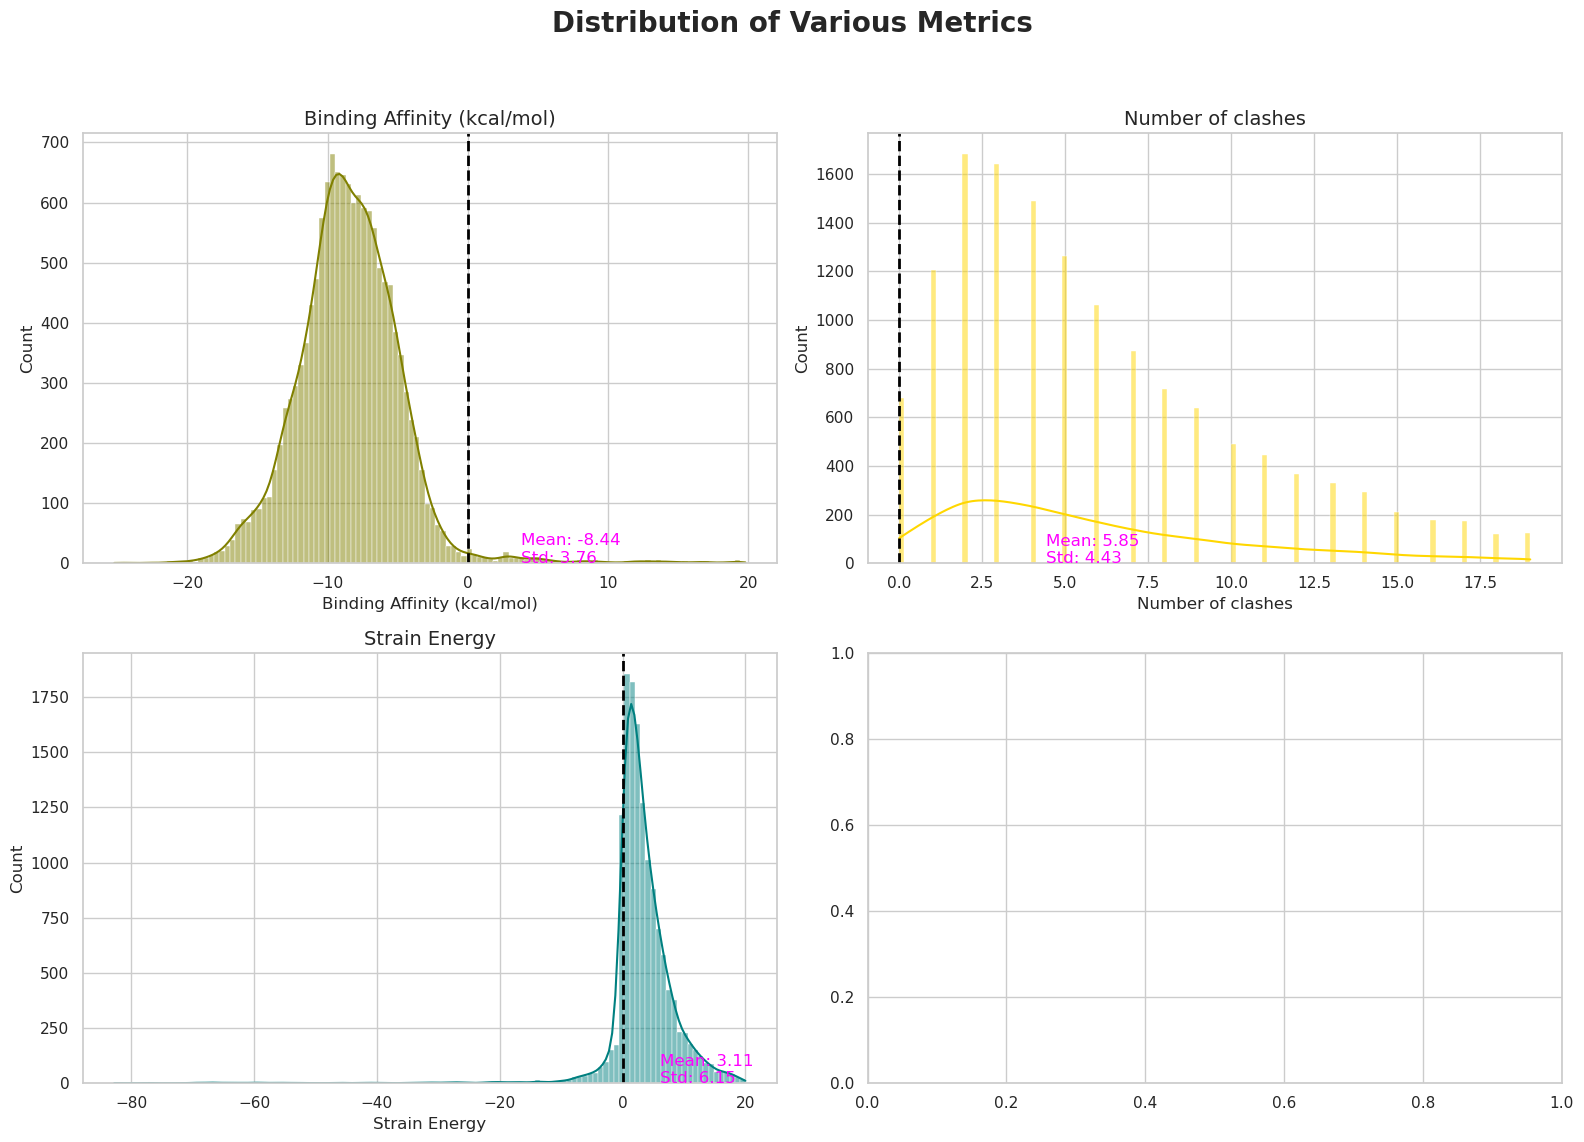

In [6]:
def plot_metrics_distributions(data, figure_title):
    # Set the overall aesthetics
    sns.set(style="whitegrid", palette="pastel")

    # Prepare the figure with a larger size for better readability
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Increased figure size for better legibility
    fig.suptitle(figure_title, fontsize=20, fontweight='bold')

    # Define a common bin size for comparable scales
    common_bins = 120  # Example bin size, adjust based on data distribution

    # List of metrics to plot
    metrics = ['Binding Affinity (kcal/mol)', 'Number of clashes', 'Strain Energy']
    colors = ['olive', 'gold', 'teal', 'purple']

    # Plotting distributions
    for i, metric in enumerate(metrics):
        ax = axes.flat[i]
        sns.histplot(data=data, x=metric, kde=True, ax=ax, color=colors[i], bins=common_bins)
        ax.set_title(metric, fontsize=14)
        ax.grid(True)

        # Calculate mean and std, and annotate on the plots
        mean_value = data[metric].mean()
        std_value = data[metric].std()
        ax.axvline(0, color='black', linestyle='dashed', linewidth=2)  # Line at 0 instead of the mean
        ax.text(std_value, 0.7, f'Mean: {mean_value:.2f}\nStd: {std_value:.2f}', color='magenta', ha='left')

    # Adjust layout for a clean look and ensure the titles and labels don't overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('data/pdbbind_dist_compass.png', dpi=1000)  # Save high-resolution plot image

    # Show plot
    plt.show()

# plot data dist.

file_path = f'{base_dir}{output_filename_pattern}'
data = pd.read_csv(file_path)
num_rows = data.shape[0]  
print(f'Total number of data points: {num_rows}')
plot_metrics_distributions(data, f'Distribution of Various Metrics')

## Data Distribution Ranges

Total number of data points: 13977


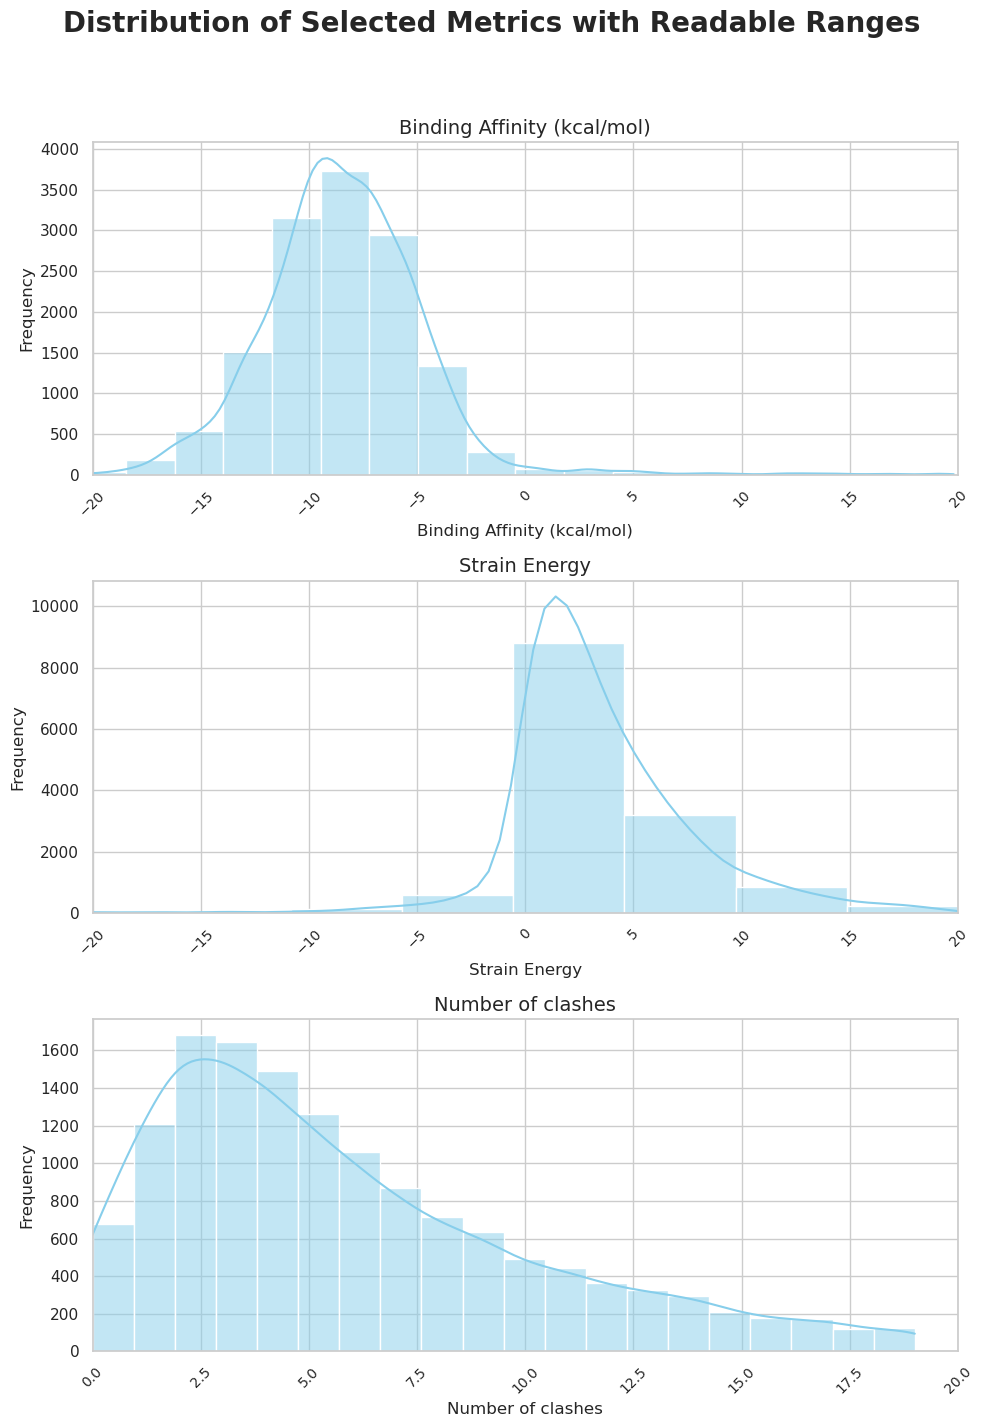

In [5]:
# Function to plot histograms with readable ranges for a given dataset
def plot_histograms_with_readable_ranges(data):
    # Enhancing overall aesthetics
    sns.set(style="whitegrid", palette="pastel")

    # Initializing a larger figure for clearer detail
    fig, axes = plt.subplots(3, 1, figsize=(10, 15))  # Using a vertical layout for better x-axis label readability

    # Titles and customization for improved readability
    fig.suptitle(f'Distribution of Selected Metrics with Readable Ranges', fontsize=20, fontweight='bold')

    # Adjusting bin sizes and x-axis limits for clarity
    metrics_info = {
        'Binding Affinity (kcal/mol)': {'bins': 20, 'ax': axes[0], 'xlim': (-20, 20)},
        'Strain Energy': {'bins': 20, 'ax': axes[1], 'xlim': (-20, 20)},
        'Number of clashes': {'bins': 20, 'ax': axes[2], 'xlim': (0, 20)}
    }

    for metric, info in metrics_info.items():
        sns.histplot(data=data, x=metric, kde=True, ax=info['ax'], bins=info['bins'], color='skyblue')
        info['ax'].set_title(metric, fontsize=14)
        info['ax'].set_xlabel(metric, fontsize=12)
        info['ax'].set_ylabel('Frequency', fontsize=12)
        info['ax'].set_xlim(info['xlim'])  # Adjusting x-axis limits for focusing on interesting ranges
        info['ax'].tick_params(axis='x', labelsize=10, rotation=45)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()




file_path = f'{base_dir}{output_filename_pattern}'
data = pd.read_csv(file_path)
num_rows = data.shape[0]  
print(f'Total number of data points: {num_rows}')
plot_histograms_with_readable_ranges(data)
